In [1]:
import pandas as pd
import numpy as np



In [26]:
DATA_Apex = pd.read_csv('../DATA/data_for_apex.csv')
DATA_Lambda_n = pd.read_csv('../DATA/data_lambda_n.csv')

# DATA_Lambda_n["case1"] = 152.6
DATA_Lambda_n

,color,lambda,case1,case2
0,Red,7065,155.6,112.6
1,Burgundy red,6678,155.6,112.4
2,Yellow,5875,155.6,112.0
3,Green,5015,155.6,111.4
4,Pine green,4921,155.6,111.3
5,Blue,4713,155.6,111.0
6,Violet,4471,155.6,110.6


In [27]:
DATA_Apex["A"] = round(180-360+DATA_Apex["case2"] - DATA_Apex["case1"],1)

In [28]:
DATA_Apex

,itteration,case1,case2,A
0,1,120.1,359.8,59.7
1,2,119.9,359.5,59.6
2,3,119.5,359.5,60.0


# Apex angle could be taken as $60^\circ$


In [29]:
Apex_angle = 60
DATA_Lambda_n["delta_min"] = round(2*(abs(DATA_Lambda_n["case2"] - DATA_Lambda_n["case1"]))- Apex_angle, 1)

DATA_Lambda_n

,color,lambda,case1,case2,delta_min
0,Red,7065,155.6,112.6,26.0
1,Burgundy red,6678,155.6,112.4,26.4
2,Yellow,5875,155.6,112.0,27.2
3,Green,5015,155.6,111.4,28.4
4,Pine green,4921,155.6,111.3,28.6
5,Blue,4713,155.6,111.0,29.2
6,Violet,4471,155.6,110.6,30.0


In [30]:
DATA_Lambda_n["n_p"] = np.sin((np.radians(DATA_Lambda_n["delta_min"]+ Apex_angle)/2)) / np.sin(np.radians(Apex_angle/2))
DATA_Lambda_n["lambda"] = round(DATA_Lambda_n["lambda"]*10**-1, 2)
DATA_Lambda_n

,color,lambda,case1,case2,delta_min,n_p
0,Red,706.5,155.6,112.6,26.0,1.363997
1,Burgundy red,667.8,155.6,112.4,26.4,1.369094
2,Yellow,587.5,155.6,112.0,27.2,1.379239
3,Green,501.5,155.6,111.4,28.4,1.394330
4,Pine green,492.1,155.6,111.3,28.6,1.396831
5,Blue,471.3,155.6,111.0,29.2,1.404306
6,Violet,447.1,155.6,110.6,30.0,1.414214


In [31]:
import matplotlib.pyplot as plt

A = 1.33224
B = 1.60124e+04


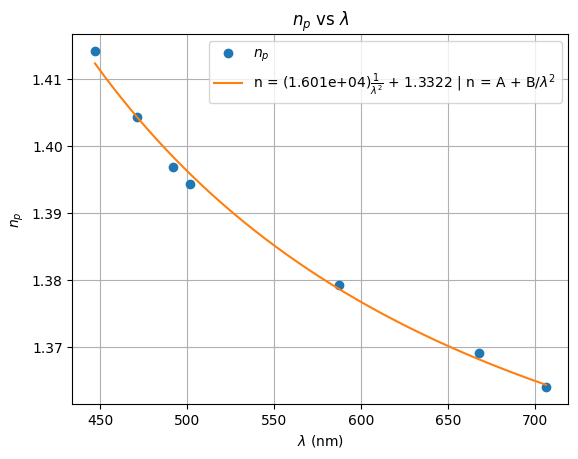

In [32]:
# regression line for n_p
from sklearn.linear_model import LinearRegression
X = (1/(DATA_Lambda_n["lambda"])**2).values.reshape(-1, 1)
y = DATA_Lambda_n["n_p"].values
model = LinearRegression()
model.fit(X, y)
# Predicted values
lambdaspace = np.linspace(DATA_Lambda_n["lambda"].min(), DATA_Lambda_n["lambda"].max(), 1000).reshape(-1, 1)
n_pred = model.predict((1/(lambdaspace)**2))
# parameteres of the regression line
slope = model.coef_[0]
intercept = model.intercept_
plt.plot(DATA_Lambda_n["lambda"], DATA_Lambda_n["n_p"], 'o', label='$n_p$')
plt.plot(lambdaspace, n_pred, '-', label=f'n = ({format(slope,".3e")})$\\frac{{1}}{{\\lambda^2}}$ + {round(intercept,4)} | n = A + B/$\\lambda^2$')

plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$n_p$')
plt.title('$n_p$ vs $\lambda$')
plt.legend()
plt.grid()
print(f"A = {round(intercept,5)}")
print(f"B = {format(slope, '.5e')}")
plt.savefig('../plots/npVSlambda.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
DATA_Lambda_n["n_p"].min(), DATA_Lambda_n["n_p"].max()

(np.float64(1.3639967201249972), np.float64(1.4142135623730954))

In [34]:
DATA_Lambda_n["lambda"].min(), DATA_Lambda_n["lambda"].max()

(np.float64(447.1), np.float64(706.5))

In [35]:
# save processed data
DATA_Lambda_n["n_p"] = DATA_Lambda_n["n_p"].round(4)
DATA_Lambda_n.to_csv('../DATA/data_lambda_n_processed.csv', index=False)
# save processed data for Apex
DATA_Apex.to_csv('../DATA/data_for_apex_processed.csv', index=False)